# EDA (Exploratory Data Analysis) del dataset de los viajes de los taxis For-Hire durante el mes de septiembre de 2024

## Paso 0: Importar librerias necesarias para el EDA y cargar el dataset que será analizado.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

* Pandas para el manejo de la data.
* Matplotlib y seaborn para la visualizacion de los gráficos pertinentes.

In [2]:
raw_fhv_tripdata = pd.read_parquet('../assets/Datasets/fhv_tripdata_2024-09.parquet')
raw_fhv_tripdata.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
0,B00014,2024-09-01 00:10:00,2024-09-01 01:31:00,NaN,NaN,NaN,B00014
1,B00112,2024-09-01 00:50:52,2024-09-01 00:50:59,NaN,210.0,NaN,B00112
2,B00112,2024-09-01 00:26:33,2024-09-01 00:52:31,NaN,14.0,NaN,B00112
3,B00112,2024-09-01 00:59:52,2024-09-01 01:06:07,NaN,14.0,NaN,B00112
4,B00225,2024-09-01 00:53:25,2024-09-01 00:58:40,NaN,4.0,NaN,B03404


# Paso 1: Exploracion de los datos
* valores erróneos
* valores nulos
* valores duplicados
* valores faltantes

In [3]:
raw_fhv_tripdata.shape

(1718375, 7)

El dataset contiene 1.718.375 filas, que representan los viajes realizados durante el mes de septiembre de 2024, y 7 columnas

In [4]:
raw_fhv_tripdata.columns.tolist()

['dispatching_base_num',
 'pickup_datetime',
 'dropOff_datetime',
 'PUlocationID',
 'DOlocationID',
 'SR_Flag',
 'Affiliated_base_number']

En líneas generales, la informacion en las columnas de este dataset contienen lo siguiente:

* Número o identificador de la base desde la cual se despachó el vehículo. (dispatching_base_num)
* Fecha y hora en que el vehículo recogió al pasajero. (pickup_datetime)
* Fecha y hora en que el pasajero fue dejado en su destino. (dropOff_datetime)
* Identificador de la ubicación donde se recogió al pasajero. (PUlocationID)
* Identificador de la ubicación donde se dejó al pasajero.DOlocationID
* Indicador binario o categórico que podría denotar algún atributo especial del viaje (SR_Flag)
*  Número o identificador de la base afiliada al vehículo (Affiliated_base_number)

En resumen, se evidencia que el dataset contiene informacion sobre los viajes realizados en el mes de septiembre de 2024 que incluyen principalmente tiempo y ubicaciones. 

A continuación se ordenara la data de acuerdo a la hora y fecha que comienza el viaje

In [5]:
raw_fhv_tripdata.sort_values(by=['pickup_datetime'])

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
268,B00887,2024-09-01 00:00:02,2024-09-01 00:46:32,NaN,87.0,NaN,B02465
910,B02855,2024-09-01 00:00:03,2024-09-01 00:38:01,NaN,61.0,NaN,B03404
869,B02563,2024-09-01 00:00:05,2024-09-01 00:01:37,NaN,198.0,NaN,B02563
637,B01381,2024-09-01 00:00:06,2024-09-01 00:04:29,NaN,7.0,NaN,B03404
1091,B03380,2024-09-01 00:00:06,2024-09-01 00:20:48,142.0,144.0,NaN,B03404
...,...,...,...,...,...,...,...
1718217,B03266,2024-09-30 23:59:36,2024-10-01 00:06:14,7.0,7.0,NaN,B03266
1717907,B01381,2024-09-30 23:59:37,2024-10-01 00:05:14,NaN,216.0,NaN,B03404
1717771,B01312,2024-09-30 23:59:43,2024-10-01 00:07:54,NaN,217.0,NaN,B03505
1717968,B01536,2024-09-30 23:59:49,2024-10-01 00:11:34,NaN,254.0,NaN,B03404


Se observa que el dataset tiene un valor inesperado, que corresponden a un mes que no es septiembre. A continuación se observará en mayor detalle estos valores.

In [6]:
raw_fhv_tripdata[raw_fhv_tripdata['dropOff_datetime'].dt.month!=9]

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
769449,B03256,2024-09-14 12:13:00,2024-10-04 12:30:00,220.0,200.0,NaN,B03256
1010357,B03113,2024-09-18 14:21:55,2024-10-03 12:42:00,171.0,116.0,NaN,B03113
1299410,B03156,2024-09-23 16:21:00,2024-10-06 11:42:00,168.0,159.0,NaN,B03156
1348903,B02550,2024-09-24 13:38:33,2024-10-24 14:00:15,NaN,163.0,NaN,B03404
1514103,B03320,2024-09-27 07:16:00,2024-10-01 00:09:00,161.0,138.0,NaN,B03404
...,...,...,...,...,...,...,...
1718368,B03524,2024-09-30 23:38:46,2024-10-01 00:07:26,NaN,NaN,NaN,B02243
1718369,B03524,2024-09-30 23:51:44,2024-10-01 00:06:16,NaN,NaN,NaN,B03404
1718372,B03524,2024-09-30 23:38:21,2024-10-01 00:13:15,NaN,NaN,NaN,B03404
1718373,B03618,2024-09-30 23:25:00,2024-10-01 00:02:00,NaN,NaN,NaN,B03618


En este caso los valores que no son del mes de septiembre son de viajes minutos despues ( primeros viajes de octubre). Como pertenecen a los extremos del rango de tiempo utilizado, se conservarán.

Tambien se observa que hay algunos valores que no corresponden al rango de tiempo de un viaje normal en la ciudad de nueva york, por lo que se procedera a elimninar.


In [7]:
# Definir el rango válido de fechas
start_date = '2024-09-01 00:00:00'
end_date = '2024-10-01 05:59:59'  # Permitir viajes hasta la madrugada del 1 de octubre

# Filtrar registros fuera del rango
extreme_times = raw_fhv_tripdata[(raw_fhv_tripdata['dropOff_datetime'] < start_date) | (raw_fhv_tripdata['dropOff_datetime'] > end_date)]
extreme_times


,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
769449,B03256,2024-09-14 12:13:00,2024-10-04 12:30:00,220.0,200.0,NaN,B03256
1010357,B03113,2024-09-18 14:21:55,2024-10-03 12:42:00,171.0,116.0,NaN,B03113
1299410,B03156,2024-09-23 16:21:00,2024-10-06 11:42:00,168.0,159.0,NaN,B03156
1348903,B02550,2024-09-24 13:38:33,2024-10-24 14:00:15,NaN,163.0,NaN,B03404
1571046,B02990,2024-09-28 01:18:00,2024-10-10 10:00:20,NaN,238.0,NaN,B03557
1637972,B03320,2024-09-29 13:24:00,2024-10-01 11:49:00,144.0,265.0,NaN,B03404
1700268,B00972,2024-09-30 15:08:26,2024-10-01 06:31:56,109.0,156.0,NaN,B00972
1713069,B03296,2024-09-30 19:52:28,2024-10-01 08:03:37,162.0,170.0,NaN,B03296
1718061,B02416,2024-09-30 23:40:47,2024-10-01 23:53:06,NaN,NaN,NaN,B02416
1718062,B02416,2024-09-30 23:02:48,2024-10-01 23:20:00,NaN,NaN,NaN,B02416


In [8]:
# Eliminar los viajes con tiempos extremos
raw_fhv_tripdata = raw_fhv_tripdata[(raw_fhv_tripdata['dropOff_datetime'] >= start_date) & (raw_fhv_tripdata['dropOff_datetime'] <= end_date)].reset_index(drop=True)

raw_fhv_tripdata.shape


(1718364, 7)

In [9]:
raw_fhv_tripdata[raw_fhv_tripdata['dropOff_datetime'].dt.month!=9]

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
1514099,B03320,2024-09-27 07:16:00,2024-10-01 00:09:00,161.0,138.0,NaN,B03404
1689429,B02677,2024-09-30 12:08:13,2024-10-01 05:44:58,NaN,150.0,NaN,B03404
1702241,B02930,2024-09-30 15:16:00,2024-10-01 05:38:13,NaN,265.0,NaN,B02930
1703341,B00078,2024-09-30 16:45:00,2024-10-01 02:50:00,NaN,NaN,NaN,B00078
1710196,B01349,2024-09-30 18:17:00,2024-10-01 00:15:00,NaN,NaN,NaN,B01349
...,...,...,...,...,...,...,...
1718357,B03524,2024-09-30 23:38:46,2024-10-01 00:07:26,NaN,NaN,NaN,B02243
1718358,B03524,2024-09-30 23:51:44,2024-10-01 00:06:16,NaN,NaN,NaN,B03404
1718361,B03524,2024-09-30 23:38:21,2024-10-01 00:13:15,NaN,NaN,NaN,B03404
1718362,B03618,2024-09-30 23:25:00,2024-10-01 00:02:00,NaN,NaN,NaN,B03618


La tabla anterior representa los viajes cuyos `dropOff_datetime` son unas pocas horas despues de mes de septiembre.

In [10]:
raw_fhv_tripdata.isnull().sum()

dispatching_base_num            0
pickup_datetime                 0
dropOff_datetime                0
PUlocationID              1319267
DOlocationID               321818
SR_Flag                   1718364
Affiliated_base_number          0
dtype: int64

Aca se observa el numero de valores nulos encontrados por cada columna. Tenemos que:

* Solo hay valores nulos en las columnas correspondientes al identificador de la ubicacion donde se recogio y donde se dejo e indicador binario.
* Para el resto de columnas no hay valores nulos.
* El numero de valores nulos en las columnas mencionadas no es el mismo. 

Se procedera a eliminar la columna SR_Flag ya que solo contiene valores nulos.

In [11]:
raw_fhv_tripdata.drop(columns=['SR_Flag'], inplace=True)

raw_fhv_tripdata


,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,Affiliated_base_number
0,B00014,2024-09-01 00:10:00,2024-09-01 01:31:00,NaN,NaN,B00014
1,B00112,2024-09-01 00:50:52,2024-09-01 00:50:59,NaN,210.0,B00112
2,B00112,2024-09-01 00:26:33,2024-09-01 00:52:31,NaN,14.0,B00112
3,B00112,2024-09-01 00:59:52,2024-09-01 01:06:07,NaN,14.0,B00112
4,B00225,2024-09-01 00:53:25,2024-09-01 00:58:40,NaN,4.0,B03404
...,...,...,...,...,...,...
1718359,B03524,2024-09-30 23:24:49,2024-09-30 23:36:05,NaN,NaN,B03404
1718360,B03524,2024-09-30 23:02:53,2024-09-30 23:26:55,NaN,NaN,B03404
1718361,B03524,2024-09-30 23:38:21,2024-10-01 00:13:15,NaN,NaN,B03404
1718362,B03618,2024-09-30 23:25:00,2024-10-01 00:02:00,NaN,NaN,B03618


In [12]:
raw_fhv_tripdata[raw_fhv_tripdata['PUlocationID'].notnull()].shape[0]/raw_fhv_tripdata.shape[0]*100

23.22540509461325

Debido a que las columna PUlocationID contiene una gran parte de datos nulos (casi 77%), y este valor es imprescindible para los objetivos del proyecto, se procedera a descartar este dataset. De igual forma, se conservará la columna para evaluar de igual forma ciertos aspectos del mismo.

In [13]:
raw_fhv_tripdata.duplicated().sum()

2579

El dataset contiene valores duplicados, los cuales seran eliminados:

In [14]:
raw_fhv_tripdata.drop_duplicates(inplace=True)
raw_fhv_tripdata.reset_index(drop=True,inplace=True)

raw_fhv_tripdata

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,Affiliated_base_number
0,B00014,2024-09-01 00:10:00,2024-09-01 01:31:00,NaN,NaN,B00014
1,B00112,2024-09-01 00:50:52,2024-09-01 00:50:59,NaN,210.0,B00112
2,B00112,2024-09-01 00:26:33,2024-09-01 00:52:31,NaN,14.0,B00112
3,B00112,2024-09-01 00:59:52,2024-09-01 01:06:07,NaN,14.0,B00112
4,B00225,2024-09-01 00:53:25,2024-09-01 00:58:40,NaN,4.0,B03404
...,...,...,...,...,...,...
1715780,B03524,2024-09-30 23:24:49,2024-09-30 23:36:05,NaN,NaN,B03404
1715781,B03524,2024-09-30 23:02:53,2024-09-30 23:26:55,NaN,NaN,B03404
1715782,B03524,2024-09-30 23:38:21,2024-10-01 00:13:15,NaN,NaN,B03404
1715783,B03618,2024-09-30 23:25:00,2024-10-01 00:02:00,NaN,NaN,B03618


In [15]:
print(raw_fhv_tripdata[raw_fhv_tripdata['PUlocationID'] <= 0].shape)
print(raw_fhv_tripdata[raw_fhv_tripdata['DOlocationID'] <= 0].shape)

(0, 6)
(0, 6)


No hay valores cero o negativos de ubicacion inicial y final.

# Paso 2: Análisis preparatorio para el proceso ETL

A continuación pasaremos a mostrar el tipo de datos de este dataset, separar las columnas por la importancia para los objetivos del proyecto y sugerencias para cambios

In [16]:
raw_fhv_tripdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715785 entries, 0 to 1715784
Data columns (total 6 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   dispatching_base_num    object        
 1   pickup_datetime         datetime64[us]
 2   dropOff_datetime        datetime64[us]
 3   PUlocationID            float64       
 4   DOlocationID            float64       
 5   Affiliated_base_number  object        
dtypes: datetime64[us](2), float64(2), object(2)
memory usage: 78.5+ MB


**Aquí se puede observar que el tipo de dato es acorde a la informacion que posee.**

### De la información anterior, las principales columnas necesarias de acuerdo a los objetivos y producto ML son:

| Columna |  Tipo de dato  | Detalle
| ------             |    -----  |--
| pickup_datetime |  datetime64[us] |--
| dropOff_datetime | datetime64[us] | --
|PUlocationID |float64 |Se deben cambiar el tipo de dato `float64` a `int32`, para que sea el mismo tipo que los demas datasets.
 |  DOlocationID |float64 | Se deben cambiar el tipo de dato `float64` a `int32`, para que sea el mismo tipo que los demas datasets.

### Columnas que, por el momento, no aportan información relevante relacionada con el proyecto


| Columna          |      Tipo de dato      
| ------             |     ----- 
| dispatching_base_num |    object              
| SR_Flag   |  float64       
| Affiliated_base_number |  object 

In [17]:
fhv_columns = raw_fhv_tripdata[['pickup_datetime',
                                 'dropOff_datetime',
                                 'PUlocationID',
                                 'DOlocationID']].copy()

fhv_columns.shape

(1715785, 4)

## Para el filtrado de datos, se sugiere seguir los siguientes criterios:

* Eliminar las filas donde `pickup_datetime` y `PUlocationID` sean nulos.

In [18]:
fhv_filtrado = fhv_columns[(fhv_columns['pickup_datetime'].notnull())&(fhv_columns['PUlocationID'].notnull())].copy().reset_index(drop=True)

fhv_filtrado.shape

(397422, 4)

* Calcular tiempo de viaje (`dropOff_datetime` - `pickup_datetime`).
* Eliminar tiempos 0 y negativos.

In [19]:
fhv_filtrado['trip_time'] = fhv_filtrado['dropOff_datetime']-fhv_filtrado['pickup_datetime']
fhv_filtrado = fhv_filtrado[fhv_filtrado['trip_time']>pd.Timedelta(0)].reset_index(drop=True)

fhv_filtrado.shape

(397422, 5)

# Paso 3: Gráficos, Distribuciones y Correlaciones

A continuación pasaremos a mostrar graficamente algunas distribuciones y correlaciones presentes en los datos

Para el producto ML que se presentará, los valores mas relevantes son la fecha, hora, y ubicacion, por lo que mostraremos los graficos de distribución considerando esos valores

**Hay que tomar en cuenta que, como este dataset le faltan bastantes ubicaciones, se haran 2 sets de graficos a ver si resalta alguna tendencia.**

In [20]:
fhv_filtrado['weekday']= fhv_filtrado['pickup_datetime'].dt.day_name()
fhv_columns['weekday']= fhv_columns['pickup_datetime'].dt.day_name()
fhv_filtrado.head()

,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,trip_time,weekday
0,2024-09-01 00:10:35,2024-09-01 00:35:57,163.0,254.0,0 days 00:25:22,Sunday
1,2024-09-01 00:41:55,2024-09-01 01:17:51,123.0,NaN,0 days 00:35:56,Sunday
2,2024-09-01 00:10:57,2024-09-01 00:16:04,123.0,NaN,0 days 00:05:07,Sunday
3,2024-09-01 00:37:08,2024-09-01 00:37:20,206.0,206.0,0 days 00:00:12,Sunday
4,2024-09-01 00:39:18,2024-09-01 00:42:44,206.0,206.0,0 days 00:03:26,Sunday


In [21]:
fhv_columns.head()

,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,weekday
0,2024-09-01 00:10:00,2024-09-01 01:31:00,NaN,NaN,Sunday
1,2024-09-01 00:50:52,2024-09-01 00:50:59,NaN,210.0,Sunday
2,2024-09-01 00:26:33,2024-09-01 00:52:31,NaN,14.0,Sunday
3,2024-09-01 00:59:52,2024-09-01 01:06:07,NaN,14.0,Sunday
4,2024-09-01 00:53:25,2024-09-01 00:58:40,NaN,4.0,Sunday


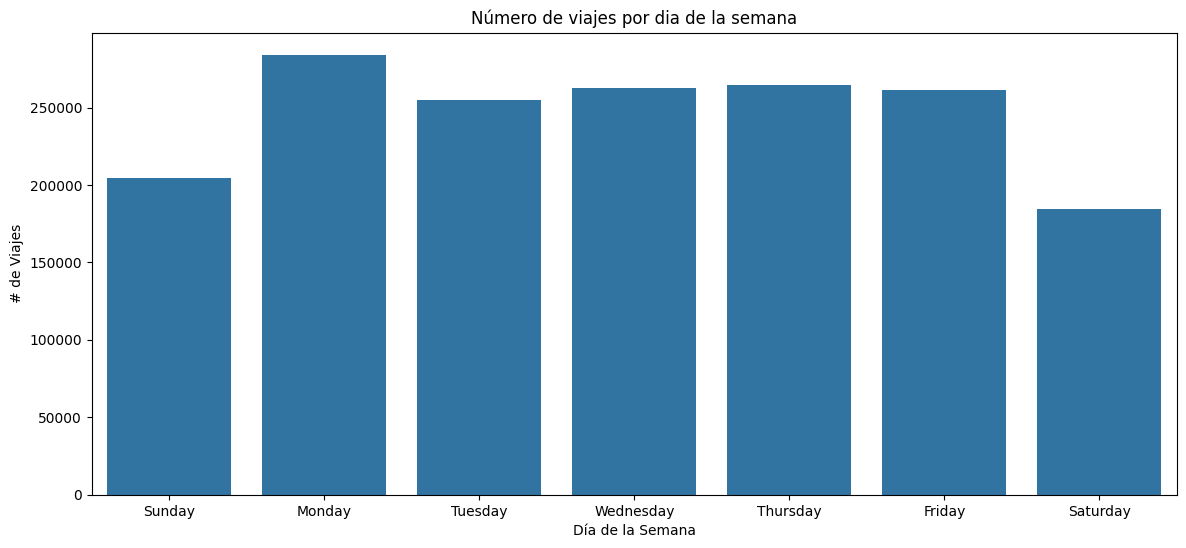

In [22]:
plt.rcParams["figure.figsize"] = (14,6)

## Data completa

sns.countplot(data=fhv_columns,x='weekday',order=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
plt.title('Número de viajes por dia de la semana') 
plt.xlabel('Día de la Semana')
plt.ylabel('# de Viajes')
plt.show()

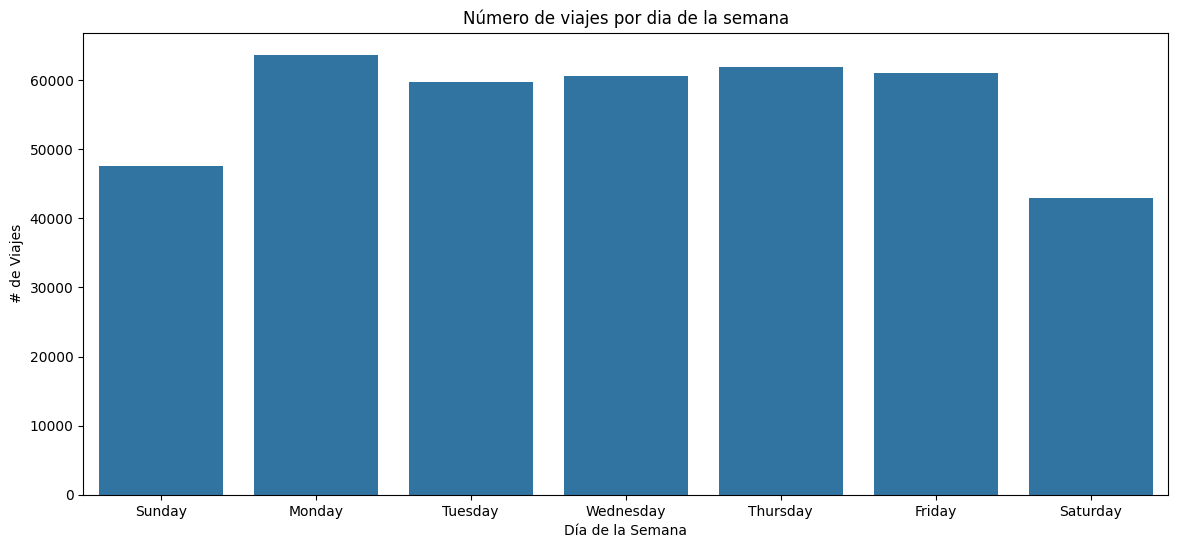

In [23]:
## Data filtrada

sns.countplot(data=fhv_filtrado,x='weekday',order=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
plt.title('Número de viajes por dia de la semana') 
plt.xlabel('Día de la Semana')
plt.ylabel('# de Viajes')
plt.show()

En ambos casos se ve un comportamiento similar, donde los dias con menos viajes son los fines de semana.

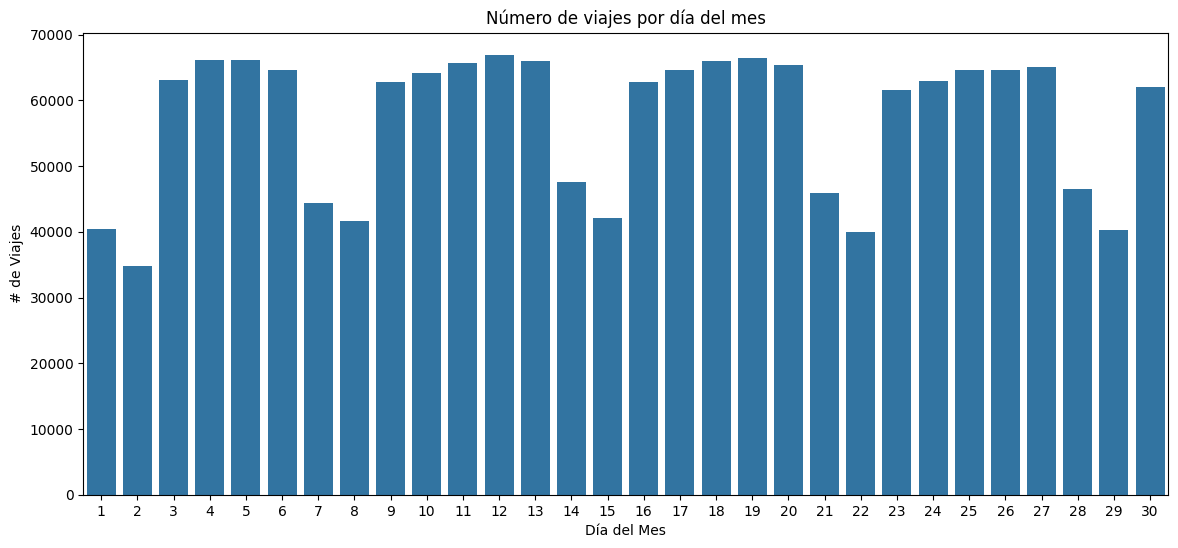

In [24]:
# Data completa

sns.countplot(data=fhv_columns,x=fhv_columns['pickup_datetime'].dt.day)
plt.title('Número de viajes por día del mes') 
plt.xlabel('Día del Mes')
plt.ylabel('# de Viajes')
plt.show()

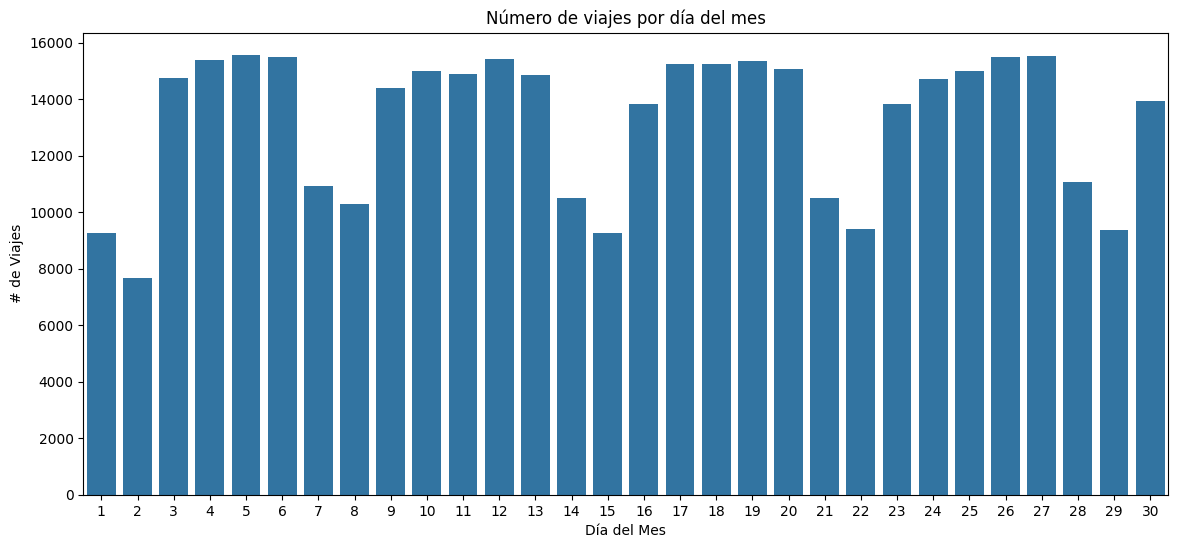

In [25]:
# Data filtrada

sns.countplot(data=fhv_filtrado,x=fhv_filtrado['pickup_datetime'].dt.day)
plt.title('Número de viajes por día del mes') 
plt.xlabel('Día del Mes')
plt.ylabel('# de Viajes')
plt.show()

Se observan comportamientos similares en ambos graficos, donde los valores mas bajos que estan adyacentes coinciden con lo visto en los graficos de dia de la semana, donde para los dias que corresponden a fin de semana se observan minimos.

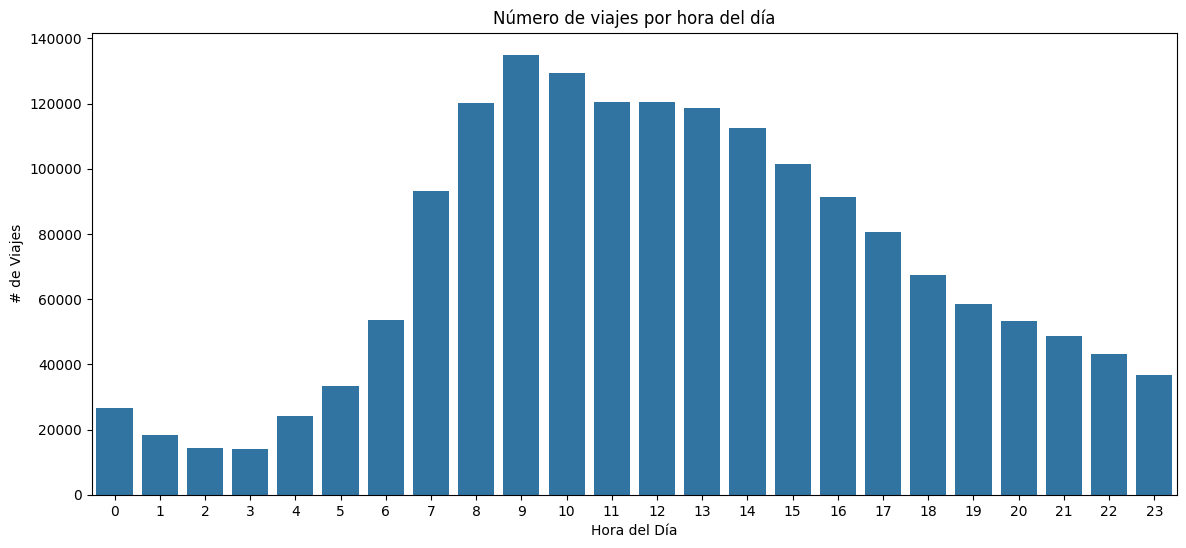

In [26]:
# Data completa

sns.countplot(data=fhv_columns,x=fhv_columns['pickup_datetime'].dt.hour)
plt.title('Número de viajes por hora del día') 
plt.xlabel('Hora del Día')
plt.ylabel('# de Viajes')
plt.show()

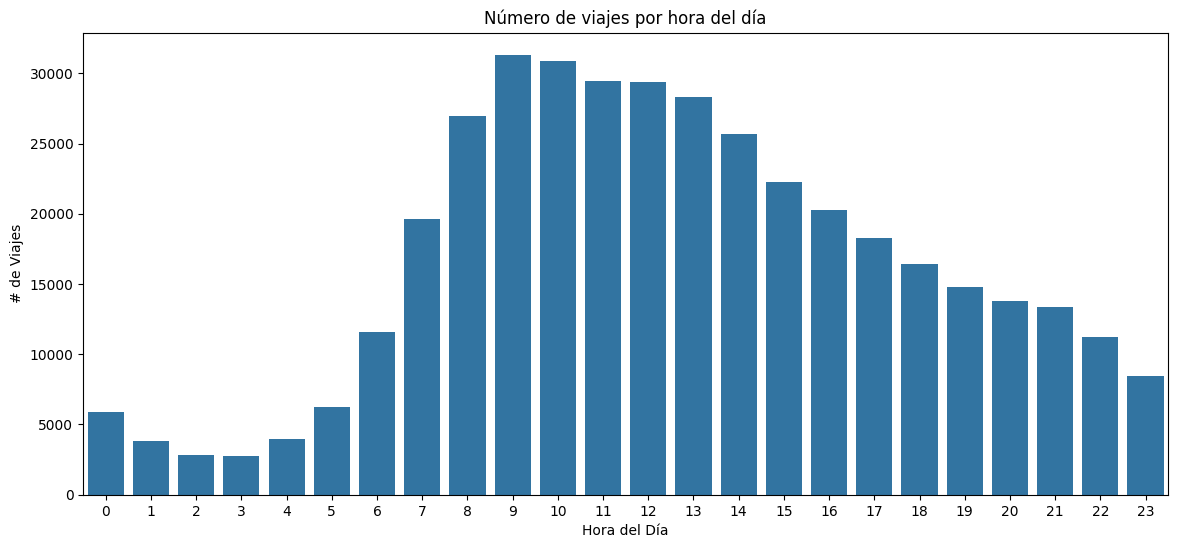

In [27]:
# Data filtrada

sns.countplot(data=fhv_filtrado,x=fhv_filtrado['pickup_datetime'].dt.hour)
plt.title('Número de viajes por hora del día') 
plt.xlabel('Hora del Día')
plt.ylabel('# de Viajes')
plt.show()

### Al examinar el numero de viajes durante el día, comenzamos en un minimo de viajes a partir de las 2-3am que comienza a crecer hasta llegar a un pico a las 9-10 am, donde luego comienza a descender lentamente. Este comportamiento se observa en ambos datasets.

In [28]:
fhv_time_transformed = fhv_filtrado.copy()

fhv_time_transformed['PU_dia']=fhv_time_transformed['pickup_datetime'].dt.day
fhv_time_transformed['PU_mes']=fhv_time_transformed['pickup_datetime'].dt.month
fhv_time_transformed['PU_hora']=fhv_time_transformed['pickup_datetime'].dt.hour
fhv_time_transformed['PU_dia_semana']=fhv_time_transformed['pickup_datetime'].dt.weekday
fhv_time_transformed['PU_año']=fhv_time_transformed['pickup_datetime'].dt.year

fhv_time_transformed.head(3)

,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,trip_time,weekday,PU_dia,PU_mes,PU_hora,PU_dia_semana,PU_año
0,2024-09-01 00:10:35,2024-09-01 00:35:57,163.0,254.0,0 days 00:25:22,Sunday,1,9,0,6,2024
1,2024-09-01 00:41:55,2024-09-01 01:17:51,123.0,NaN,0 days 00:35:56,Sunday,1,9,0,6,2024
2,2024-09-01 00:10:57,2024-09-01 00:16:04,123.0,NaN,0 days 00:05:07,Sunday,1,9,0,6,2024


In [29]:
fhv_columns_time_transformed = fhv_columns.copy()

fhv_columns_time_transformed['PU_dia']=fhv_columns_time_transformed['pickup_datetime'].dt.day
fhv_columns_time_transformed['PU_mes']=fhv_columns_time_transformed['pickup_datetime'].dt.month
fhv_columns_time_transformed['PU_hora']=fhv_columns_time_transformed['pickup_datetime'].dt.hour
fhv_columns_time_transformed['PU_dia_semana']=fhv_columns_time_transformed['pickup_datetime'].dt.weekday
fhv_columns_time_transformed['PU_año']=fhv_columns_time_transformed['pickup_datetime'].dt.year

fhv_columns_time_transformed.head(3)

,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,weekday,PU_dia,PU_mes,PU_hora,PU_dia_semana,PU_año
0,2024-09-01 00:10:00,2024-09-01 01:31:00,NaN,NaN,Sunday,1,9,0,6,2024
1,2024-09-01 00:50:52,2024-09-01 00:50:59,NaN,210.0,Sunday,1,9,0,6,2024
2,2024-09-01 00:26:33,2024-09-01 00:52:31,NaN,14.0,Sunday,1,9,0,6,2024


In [30]:
trip_counts= fhv_time_transformed.groupby(['PU_año', 'PU_mes','PU_dia','PU_hora','PU_dia_semana','weekday'])\
                                .agg(Count=('PU_hora','count'))\
                                .reset_index()

trip_counts

,PU_año,PU_mes,PU_dia,PU_hora,PU_dia_semana,weekday,Count
0,2024,9,1,0,6,Sunday,242
1,2024,9,1,1,6,Sunday,202
2,2024,9,1,2,6,Sunday,140
3,2024,9,1,3,6,Sunday,125
4,2024,9,1,4,6,Sunday,125
...,...,...,...,...,...,...,...
715,2024,9,30,19,0,Monday,429
716,2024,9,30,20,0,Monday,408
717,2024,9,30,21,0,Monday,356
718,2024,9,30,22,0,Monday,269


In [31]:
trip_counts_columns= fhv_columns_time_transformed.groupby(['PU_año', 'PU_mes','PU_dia','PU_hora','PU_dia_semana','weekday'])\
                                .agg(Count=('PU_hora','count'))\
                                .reset_index()

trip_counts_columns

,PU_año,PU_mes,PU_dia,PU_hora,PU_dia_semana,weekday,Count
0,2024,9,1,0,6,Sunday,1291
1,2024,9,1,1,6,Sunday,1043
2,2024,9,1,2,6,Sunday,826
3,2024,9,1,3,6,Sunday,705
4,2024,9,1,4,6,Sunday,774
...,...,...,...,...,...,...,...
715,2024,9,30,19,0,Monday,1833
716,2024,9,30,20,0,Monday,1599
717,2024,9,30,21,0,Monday,1325
718,2024,9,30,22,0,Monday,1123


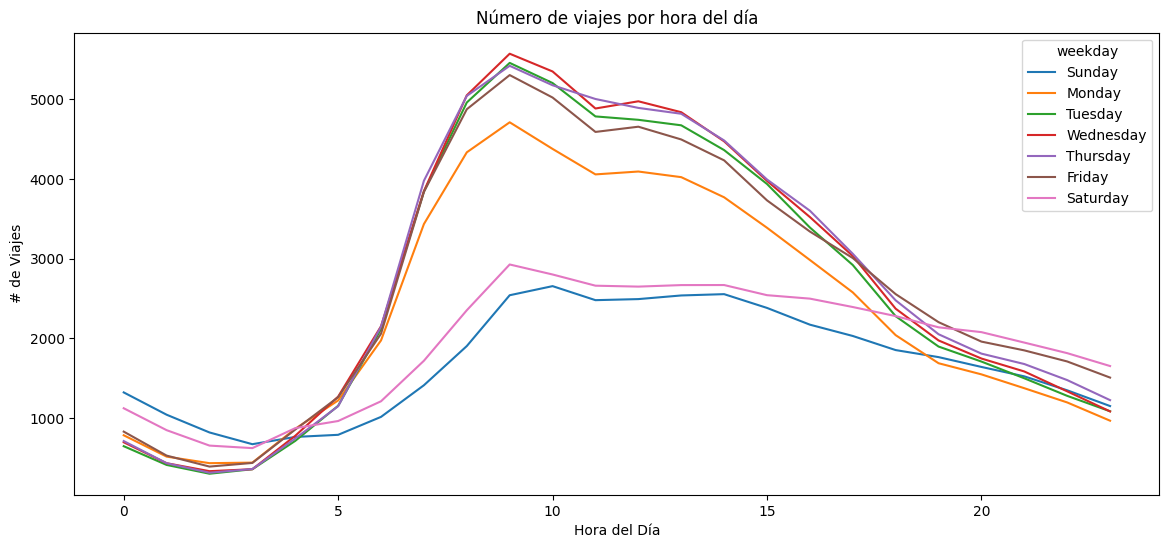

In [32]:
# Data completa

sns.lineplot(data=trip_counts_columns,x=trip_counts_columns['PU_hora'],y=trip_counts_columns['Count'],hue=trip_counts_columns['weekday'],errorbar=None)
plt.title('Número de viajes por hora del día') 
plt.xlabel('Hora del Día')
plt.ylabel('# de Viajes')
plt.show()

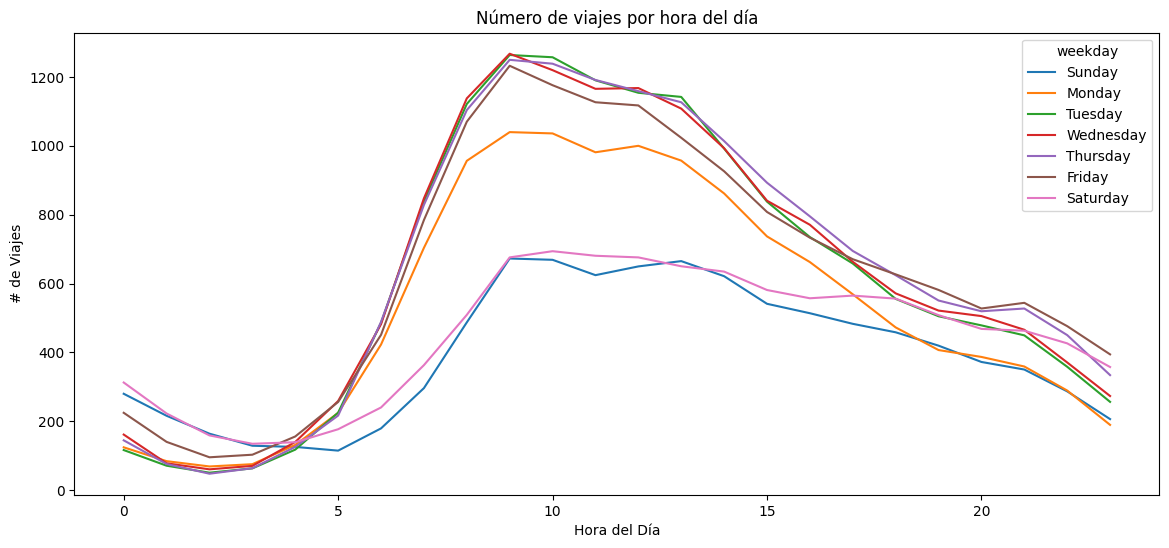

In [33]:
# Data filtrada

sns.lineplot(data=trip_counts,x=trip_counts['PU_hora'],y=trip_counts['Count'],hue=trip_counts['weekday'],errorbar=None)
plt.title('Número de viajes por hora del día') 
plt.xlabel('Hora del Día')
plt.ylabel('# de Viajes')
plt.show()

### **Al examinar el numero de viajes durante el día, pero separando segun el dia de la semana, podemos observar que en la muestra utilizada hay una diferencia clara entre los dia de semana (Lun-Vie) y los fines de semana (Sab-Dom). Tambien resalta que el dia lunes se diferencia del resto de los dias de la semana**

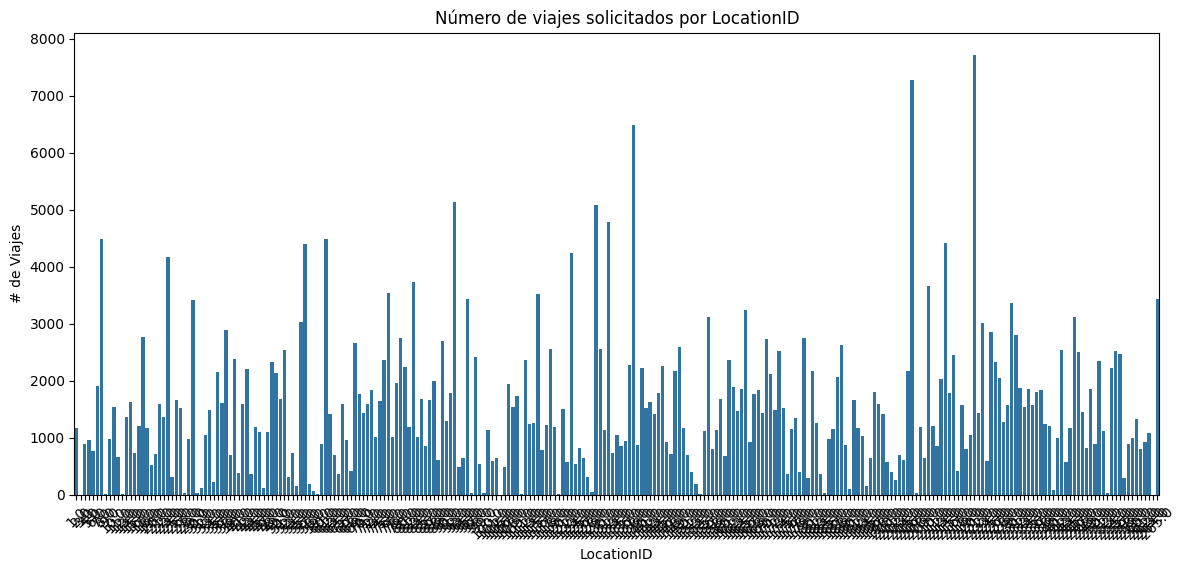

In [34]:
sns.countplot(data=fhv_filtrado,x='PUlocationID')
plt.title('Número de viajes solicitados por LocationID') 
plt.xlabel('LocationID')
plt.ylabel('# de Viajes')
plt.xticks(rotation=45)
plt.show()

### Acá se puede observar la cantidad de viajes solicitados por zona de NY. Al tener tantas zonas el grafico esta muy saturado, pero se puede observar claramente ciertas zonas donde claramente hay mayor demanda. A continuación se filtrará la data para obtener solo aquellos con un numero alto de solicitudes.

In [35]:
conteo_2500 = fhv_filtrado.groupby('PUlocationID').filter(lambda x: len(x) >= 2500).copy().reset_index()
# yellow_tripdata_sample[yellow_tripdata_sample['PULocationID'].isin(yellow_tripdata_sample['PULocationID'].value_counts()[yellow_tripdata_sample['PULocationID'].value_counts()>25000].index)]
# Forma secundaria

conteo_2500

,index,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,trip_time,weekday
0,1,2024-09-01 00:41:55,2024-09-01 01:17:51,123.0,NaN,0 days 00:35:56,Sunday
1,2,2024-09-01 00:10:57,2024-09-01 00:16:04,123.0,NaN,0 days 00:05:07,Sunday
2,3,2024-09-01 00:37:08,2024-09-01 00:37:20,206.0,206.0,0 days 00:00:12,Sunday
3,4,2024-09-01 00:39:18,2024-09-01 00:42:44,206.0,206.0,0 days 00:03:26,Sunday
4,5,2024-09-01 00:44:25,2024-09-01 00:51:30,206.0,221.0,0 days 00:07:05,Sunday
...,...,...,...,...,...,...,...
154105,397394,2024-09-30 23:11:54,2024-09-30 23:33:34,231.0,236.0,0 days 00:21:40,Monday
154106,397399,2024-09-30 23:52:38,2024-10-01 00:22:48,138.0,230.0,0 days 00:30:10,Monday
154107,397403,2024-09-30 23:26:45,2024-10-01 00:17:57,138.0,142.0,0 days 00:51:12,Monday
154108,397404,2024-09-30 23:00:32,2024-09-30 23:30:04,61.0,26.0,0 days 00:29:32,Monday


In [36]:
fhv_filtrado['PUlocationID'].nunique()

261

In [37]:
fhv_filtrado['PUlocationID'].value_counts()[fhv_filtrado['PUlocationID'].value_counts()>=2500].shape[0]

43

### De lo anterior se observa que de los 261 diferentes LocationID, en 43 de ellos es donde se concentra la mayoría de las solicitudes

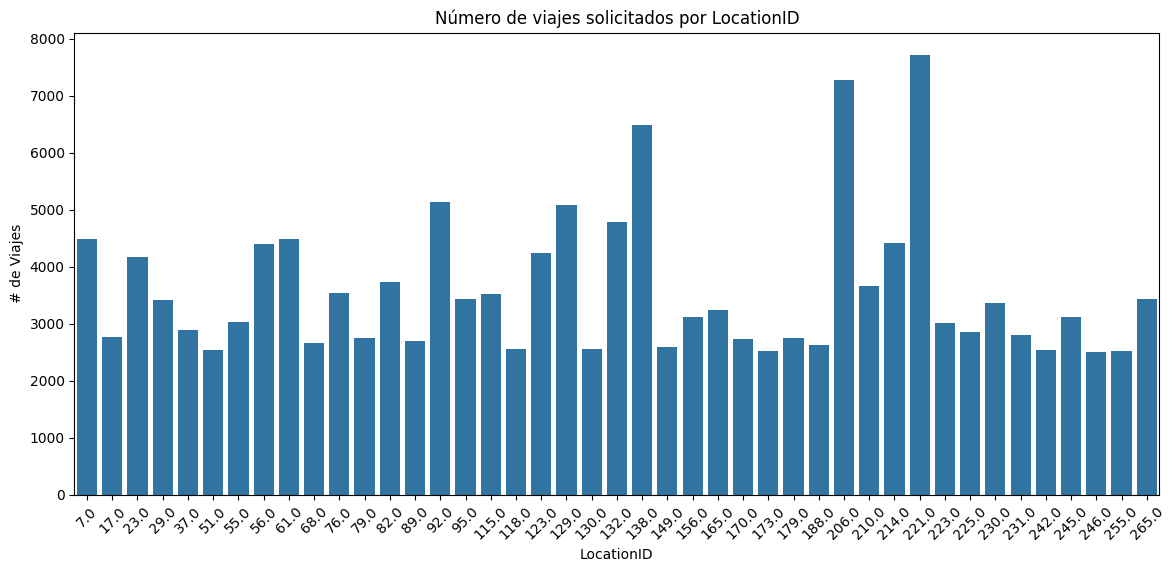

In [38]:
sns.countplot(data=conteo_2500,x='PUlocationID')
plt.title('Número de viajes solicitados por LocationID') 
plt.xlabel('LocationID')
plt.ylabel('# de Viajes')
plt.xticks(rotation=45)
plt.show()

# EDA (Exploratory Data Analysis) REPORTE

* Se encuentra que las columnas de la fecha y hora en el que se recogio y dejo el cliente se encuentran en buen estado y con posibilidad de uso en el proyecto. Se estima que la calidad de estos datos es de 100%

* Sin embargo se encuentra que de las 7 columnas con las que se inicio, se hizo el respectivo analisis de valores nulos,  y se encuentra que una columna (SR_Flag) es totalmente nula, las demas columas que es la ubicacion en la que se recogio y dejo el cliente, no cuenta en su totalidad con los datos, por lo que puede presentar problemas en un futuro. Por tal razon se eliminaron del dataset.

In [39]:
# Calcular completitud
def calculate_quality(fhv_tripdata_sample):
    quality_scores = {}

    # Completitud: proporción de valores no nulos
    completeness = fhv_tripdata_sample.notnull().mean()

    # Validez y consistencia según reglas específicas para cada columna
    # Ejemplo: pickup_datetime y dropOff_datetime
    valid_dates = (fhv_tripdata_sample['dropOff_datetime'] > fhv_tripdata_sample['pickup_datetime']).mean()
    
    # Ejemplo: dispatching_base_num y Affiliated_base_number
    valid_base_num = fhv_tripdata_sample['dispatching_base_num'].str.isalnum().mean()
    valid_affiliated_base = fhv_tripdata_sample['Affiliated_base_number'].str.isalnum().mean()

    # Calcular la calidad de cada columna
    quality_scores['pickup_datetime'] = completeness['pickup_datetime'] * valid_dates
    quality_scores['dropOff_datetime'] = completeness['dropOff_datetime'] * valid_dates
    quality_scores['dispatching_base_num'] = completeness['dispatching_base_num'] * valid_base_num
    quality_scores['Affiliated_base_number'] = completeness['Affiliated_base_number'] * valid_affiliated_base

    # Calcular el promedio de calidad general
    overall_quality = sum(quality_scores.values()) / len(quality_scores)
    
    return quality_scores, overall_quality


In [40]:
quality_scores, overall_quality = calculate_quality(raw_fhv_tripdata)
print("Calidad por columna:", quality_scores)
print("Calidad general del dataset:", overall_quality * 100, "%")


Calidad por columna: {'pickup_datetime': 1.0, 'dropOff_datetime': 1.0, 'dispatching_base_num': 1.0, 'Affiliated_base_number': 0.9823462729887485}
Calidad general del dataset: 99.55865682471871 %


In [41]:
# Definir el número de columnas originales y restantes
columnas_originales = 7
columnas_restantes = 4

# Calcular el porcentaje de columnas restantes
porcentaje_restante = (columnas_restantes / columnas_originales) * 100

# Mostrar el resultado
print(f"Porcentaje de columnas restantes: {porcentaje_restante:.2f}%")

Porcentaje de columnas restantes: 57.14%


En este calculo podemos ver que la calidad de los datos en este Dataset, **en terminos de columnas**, es 57.14%. 

In [42]:
discarded_rows = fhv_columns.shape[0]-fhv_filtrado.shape[0]

discarded_rows

1318363

### Acá se contabilizan las filas que se consideran de calidad y aquellas que han sido descartadas bajo el criterio de `PUlocationID` no nulos.

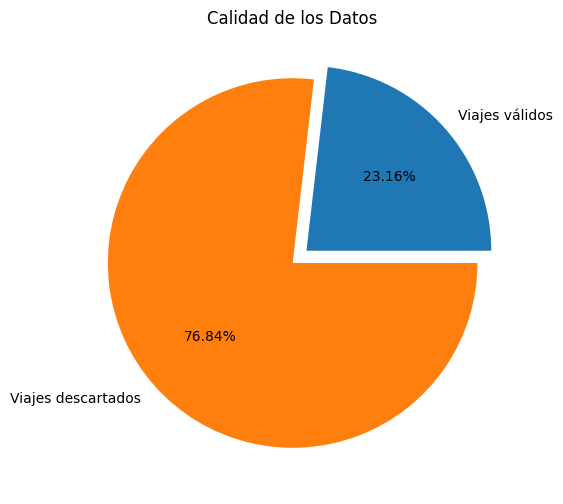

In [43]:
data = [fhv_filtrado.shape[0], discarded_rows]
keys = ['Viajes válidos', 'Viajes descartados']
plt.title('Calidad de los Datos') 
plt.pie(data, labels=keys,explode=[0.1,0], autopct='%.2f%%')
plt.show()

## Se tiene que luego de los filtros realizados, solo un poco mas del 23% de la data es de calidad. Como se comentó anteriormente, este dataset no se considerará para el producto ML de este proyecto.

Ahora queremos observar las correlaciones entre las variables, para ello agruparemos segun la ubicación.

In [44]:
fhv_time_transformed.head()

,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,trip_time,weekday,PU_dia,PU_mes,PU_hora,PU_dia_semana,PU_año
0,2024-09-01 00:10:35,2024-09-01 00:35:57,163.0,254.0,0 days 00:25:22,Sunday,1,9,0,6,2024
1,2024-09-01 00:41:55,2024-09-01 01:17:51,123.0,NaN,0 days 00:35:56,Sunday,1,9,0,6,2024
2,2024-09-01 00:10:57,2024-09-01 00:16:04,123.0,NaN,0 days 00:05:07,Sunday,1,9,0,6,2024
3,2024-09-01 00:37:08,2024-09-01 00:37:20,206.0,206.0,0 days 00:00:12,Sunday,1,9,0,6,2024
4,2024-09-01 00:39:18,2024-09-01 00:42:44,206.0,206.0,0 days 00:03:26,Sunday,1,9,0,6,2024


In [45]:
location_counts= fhv_time_transformed.groupby(['PU_año', 'PU_mes','PU_dia','PU_hora','PU_dia_semana','weekday','PUlocationID'])\
                                .agg(Count=('PUlocationID','count'))\
                                .reset_index()

location_counts

,PU_año,PU_mes,PU_dia,PU_hora,PU_dia_semana,weekday,PUlocationID,Count
0,2024,9,1,0,6,Sunday,4.0,1
1,2024,9,1,0,6,Sunday,7.0,3
2,2024,9,1,0,6,Sunday,13.0,2
3,2024,9,1,0,6,Sunday,17.0,2
4,2024,9,1,0,6,Sunday,18.0,1
...,...,...,...,...,...,...,...,...
113268,2024,9,30,23,0,Monday,259.0,1
113269,2024,9,30,23,0,Monday,260.0,1
113270,2024,9,30,23,0,Monday,261.0,1
113271,2024,9,30,23,0,Monday,262.0,1


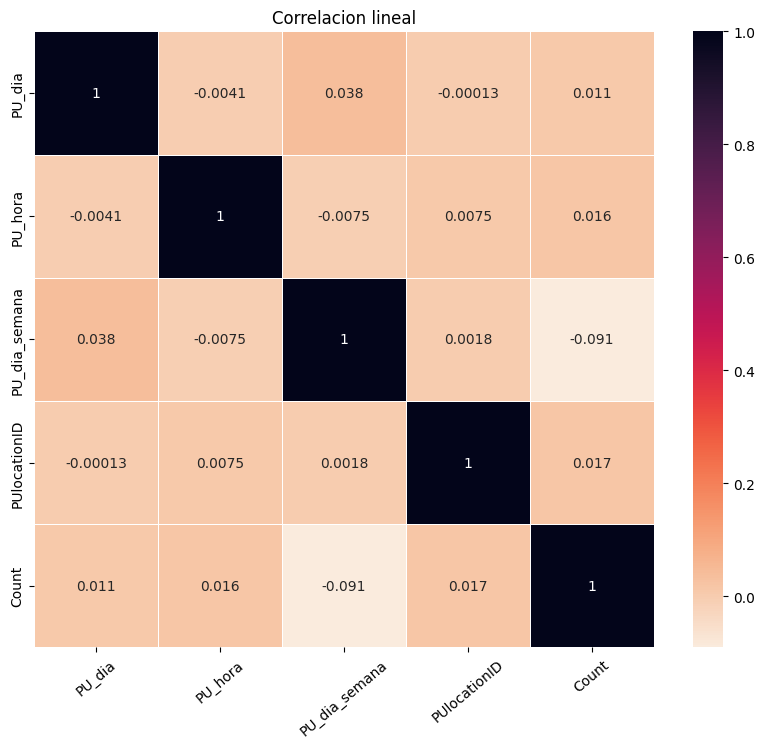

In [46]:
time_location_corr = location_counts[[ 'PU_dia', 'PU_hora', 'PU_dia_semana','PUlocationID', 'Count']].corr(method='pearson')

plt.figure(figsize=(10,8))
sns.heatmap(time_location_corr, annot=True, linewidth=.5,cmap='rocket_r')
plt.title('Correlacion lineal') 
plt.xticks(rotation=40)
plt.show()

In [47]:
fhv_columns_time_transformed.head()

,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,weekday,PU_dia,PU_mes,PU_hora,PU_dia_semana,PU_año
0,2024-09-01 00:10:00,2024-09-01 01:31:00,NaN,NaN,Sunday,1,9,0,6,2024
1,2024-09-01 00:50:52,2024-09-01 00:50:59,NaN,210.0,Sunday,1,9,0,6,2024
2,2024-09-01 00:26:33,2024-09-01 00:52:31,NaN,14.0,Sunday,1,9,0,6,2024
3,2024-09-01 00:59:52,2024-09-01 01:06:07,NaN,14.0,Sunday,1,9,0,6,2024
4,2024-09-01 00:53:25,2024-09-01 00:58:40,NaN,4.0,Sunday,1,9,0,6,2024


In [48]:
time_counts= fhv_time_transformed.groupby(['PU_año', 'PU_mes','PU_dia','PU_hora','PU_dia_semana','weekday'])\
                                .agg(Count=('PU_hora','count'))\
                                .reset_index()

time_counts

,PU_año,PU_mes,PU_dia,PU_hora,PU_dia_semana,weekday,Count
0,2024,9,1,0,6,Sunday,242
1,2024,9,1,1,6,Sunday,202
2,2024,9,1,2,6,Sunday,140
3,2024,9,1,3,6,Sunday,125
4,2024,9,1,4,6,Sunday,125
...,...,...,...,...,...,...,...
715,2024,9,30,19,0,Monday,429
716,2024,9,30,20,0,Monday,408
717,2024,9,30,21,0,Monday,356
718,2024,9,30,22,0,Monday,269


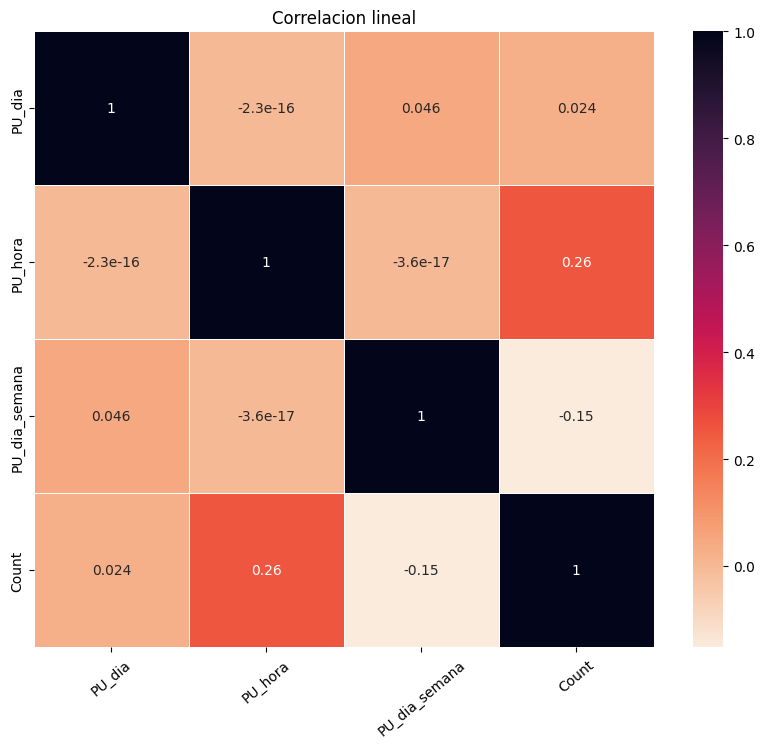

In [49]:
time_corr = time_counts[['PU_dia', 'PU_hora', 'PU_dia_semana', 'Count']].corr(method='pearson')

plt.figure(figsize=(10,8))
sns.heatmap(time_corr, annot=True, linewidth=.5, cmap='rocket_r')
plt.title('Correlacion lineal') 
plt.xticks(rotation=40)
plt.show()

## Se corrobora, al igual que en otros datasets, la influencia que tiene la hora del dia en la demanda de taxis. Aqui tambien se observa una pequeña influencia del dia de la semana.